In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import tarfile
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import glob
import sys
import pickle

import matplotlib.pyplot as plt

In [ ]:
with tarfile.open('/content/drive/MyDrive/women.tar') as tar:
  tar.extractall('/content/drive/MyDrive/women')

In [ ]:
with tarfile.open('/content/drive/MyDrive/women.tar') as tar:
  names = tar.getnames()

In [ ]:
txt_paths = glob.glob('/content/drive/MyDrive/labels/*.txt')
txt_paths

['/content/drive/MyDrive/labels/top_test_detect_all.txt',
 '/content/drive/MyDrive/labels/dress_test_detect_all.txt',
 '/content/drive/MyDrive/labels/skirt_test_detect_all.txt',
 '/content/drive/MyDrive/labels/jacket_test_detect_all.txt',
 '/content/drive/MyDrive/labels/pants_test_detect_all.txt',
 '/content/drive/MyDrive/labels/top_train_detect_all.txt',
 '/content/drive/MyDrive/labels/skirt_train_detect_all.txt',
 '/content/drive/MyDrive/labels/pants_train_detect_all.txt',
 '/content/drive/MyDrive/labels/dress_train_detect_all.txt',
 '/content/drive/MyDrive/labels/jacket_train_detect_all.txt']

In [ ]:
def sort_file_paths(files):
  sort = sorted(txt_paths)
  return sort

In [ ]:
txt_paths = sort_file_paths(txt_paths)
txt_paths

['/content/drive/MyDrive/labels/dress_test_detect_all.txt',
 '/content/drive/MyDrive/labels/dress_train_detect_all.txt',
 '/content/drive/MyDrive/labels/jacket_test_detect_all.txt',
 '/content/drive/MyDrive/labels/jacket_train_detect_all.txt',
 '/content/drive/MyDrive/labels/pants_test_detect_all.txt',
 '/content/drive/MyDrive/labels/pants_train_detect_all.txt',
 '/content/drive/MyDrive/labels/skirt_test_detect_all.txt',
 '/content/drive/MyDrive/labels/skirt_train_detect_all.txt',
 '/content/drive/MyDrive/labels/top_test_detect_all.txt',
 '/content/drive/MyDrive/labels/top_train_detect_all.txt']

In [ ]:
def split_string(array):

  cat = []
  sub = []
  prod_no = []
  gender = []
  prod_name = []

  for j,file in enumerate(array):
    
    lines= []
    
    with open(file,'r')as f:
      lines = f.readlines()
    
    for i,x in enumerate(lines):
      
      #category = '^([a-z]+[^\/])+'
      #sub_category = '[\/][a-z]+[^\/]+'
      #product = '([\/][0-9]+)'

      string = x.split(sep=('/'))
      gender.append(string[0])
      cat.append(string[1])
      sub.append(string[2])
      
      #print(string[3])
      prod_no.append(string[3])


      t = string[4].split('\t')[2]
      #print(t)
      prod_name.append(t[:-1])

  return cat,sub,prod_no,gender,prod_name

In [ ]:
cat,sub,prod_no,gender,prod_name = split_string(txt_paths)

In [ ]:
cat = pd.Series(cat)
sub = pd.Series(sub)
prod_no = pd.Series(prod_no)
gender = pd.Series(gender)
prod_name = pd.Series(prod_name)

df = pd.concat([gender,cat,sub,prod_no,prod_name],axis=1)
df.rename(columns={0:'gender',1:'category',2:'sub-category',3:'product-number',4:'product-name'},inplace=True)
df

,gender,category,sub-category,product-number,product-name
0,women,dresses,casual_and_day_dresses,56037632,black knit midi dress
1,women,dresses,casual_and_day_dresses,56037632,black knit midi dress
2,women,dresses,casual_and_day_dresses,56037632,black knit midi dress
3,women,dresses,casual_and_day_dresses,56037632,black knit midi dress
4,women,dresses,casual_and_day_dresses,56037632,black knit midi dress
...,...,...,...,...,...
201833,women,tops,t-shirts,91437753,white run shirt
201834,women,tops,t-shirts,91437753,white run shirt
201835,women,tops,t-shirts,91438020,multicolor clay tee chalk
201836,women,tops,t-shirts,91438020,multicolor clay tee chalk


In [ ]:
with open('/content/drive/MyDrive/Pickle files/data_frame','ab') as f:
  pickle.dump(df,f)

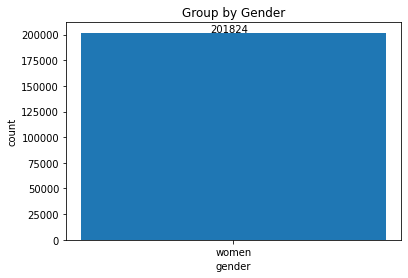

In [ ]:
data_gender = df.groupby('gender').count()['category'].rename('count')
#plt.bar(data_gender.index,data_gender['women'],width=0.1)

fig, ax = plt.subplots(1,1)
bar = ax.bar(data_gender.index,data_gender['women'])
for x in bar:
  ax.text((x.get_x()-0.06+x.get_width()/2),x.get_height()+100,s=x.get_height())
plt.xlabel('gender')
plt.ylabel('count')
plt.title('Group by Gender')
plt.show()

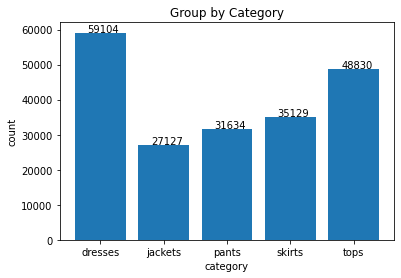

In [ ]:
data_category = df.groupby('category').count()['gender'].rename('count')

fig, ax = plt.subplots(1,1)
bar = ax.bar(data_category.index,data_category.values)
for x in bar:
  ax.text((x.get_x()-0.2+x.get_width()/2),x.get_height()+100,s=x.get_height())

plt.xlabel('category')
plt.ylabel('count')
plt.title('Group by Category')
plt.show()

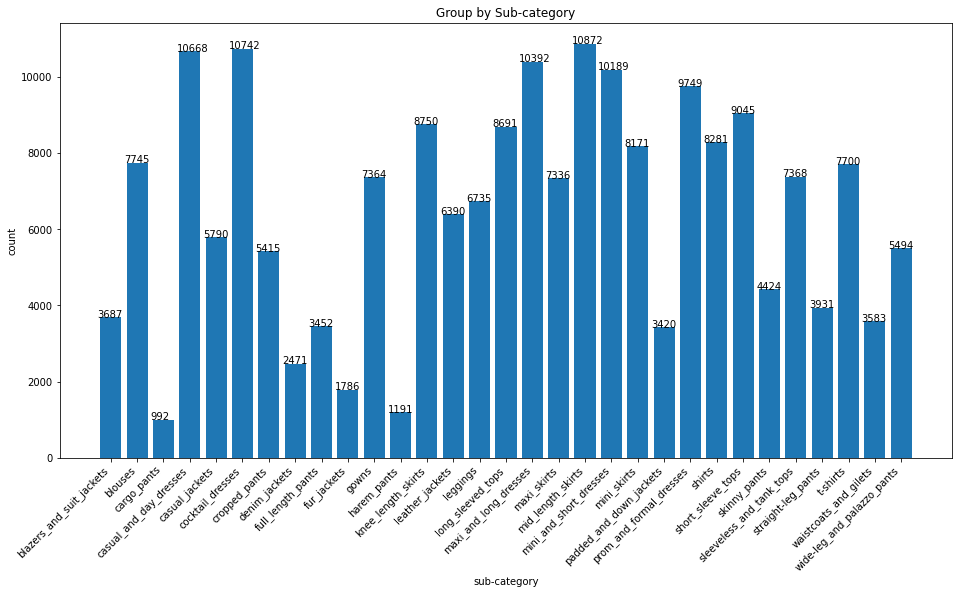

In [ ]:
data_sub = df.groupby('sub-category').count()['gender'].rename('count')

fig, ax = plt.subplots(1,1,figsize=[16,8])
bar = ax.bar(data_sub.index,data_sub.values)
for x in bar:
  ax.text((x.get_x()-0.5+x.get_width()/2),x.get_height(),s=x.get_height())
plt.xlabel('sub-category')
plt.xticks(rotation=45,ha='right')
plt.ylabel('count')
plt.title('Group by Sub-category')
plt.show()


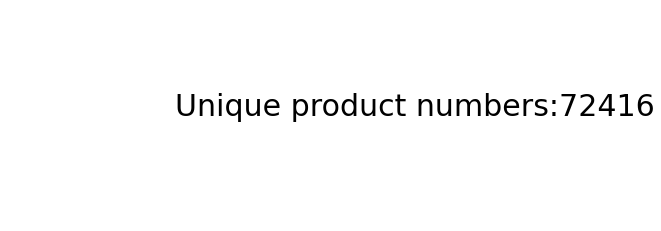

In [ ]:
plt.text(0.5,0.5,s=("Unique product numbers:"+str(df['product-number'].nunique())),fontdict={'fontsize':30})
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

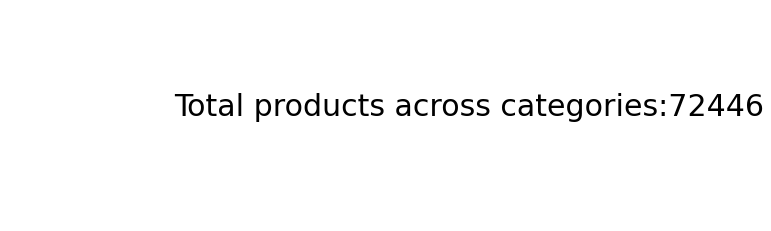

In [ ]:
plt.text(0.5,0.5,s=("Total products across categories:"+str(df.groupby(['category','sub-category','product-number']).count().shape[0]))\
         ,fontdict={'fontsize':30})
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.tick_params(left = False, right = False , labelleft = False ,
                labelbottom = False, bottom = False)

In [ ]:
df.groupby('product-name').count()

,gender,category,sub-category,product-number
product-name,,,,
,14,14,14,14
2 packable down jacket blue,1,1,1,1
3d double layered a-line skirt,5,5,5,5
7 all mankind black white reptile print ankle skinny leg,1,1,1,1
7 all mankind ethereal blue contour mid-rise skinny leg,1,1,1,1
...,...,...,...,...
your leggings black plaid,2,2,2,2
zipped virgin wool skirt silk black,4,4,4,4
zipped wool jacket green,1,1,1,1


In [ ]:
#No product name
indices = df[df['product-name']==""].index
df.drop(index=indices,axis=0,inplace=True)

In [ ]:
#group = df.groupby(['category','sub-category','product-number']).count().reset_index()
result =group[group['product-number'].duplicated()] 

# No. of duplicate products present in different sub categories

In [ ]:
group[group['product-number'].isin(result['product-number'])].sort_values(by='product-number')
# plt.text(0,0.5,s=("Duplicates")\
#          ,fontdict={'fontsize':30})
# plt.gca().spines['top'].set_visible(False)
# plt.gca().spines['right'].set_visible(False)
# plt.gca().spines['bottom'].set_visible(False)
# plt.gca().spines['left'].set_visible(False)
# plt.tick_params(left = False, right = False , labelleft = False ,
#                 labelbottom = False, bottom = False)

,category,sub-category,product-number,gender,product-name
7288,dresses,gowns,30890370,3,3
10518,dresses,maxi_and_long_dresses,30890370,3,3
13993,dresses,mini_and_short_dresses,51727804,1,1
0,dresses,casual_and_day_dresses,51727804,1,1
3747,dresses,cocktail_dresses,59904615,1,1
14018,dresses,mini_and_short_dresses,59904615,1,1
63417,tops,short_sleeve_tops,61552469,4,4
69785,tops,t-shirts,61552469,4,4
10566,dresses,maxi_and_long_dresses,63862712,2,2
28,dresses,casual_and_day_dresses,63862712,2,2
